In [106]:
# Libraries
import time
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import integrate, special

# Calculation

## Crossing Angle

In [100]:
a = 2
f = sp.exp(-x**2/a)
print(f.integrate((x, -sp.oo, sp.oo)))

sqrt(2)*sqrt(pi)


In [101]:
x, y, s, s0, phi, sx, sy, sz = sp.symbols('x, y, s, s0, phi, sx, sy, sz')

x1 = x*sp.cos(phi/2) - s*sp.sin(phi/2)
x2 = x*sp.cos(phi/2) + s*sp.sin(phi/2)
s1 = s*sp.cos(phi/2) + x*sp.sin(phi/2)
s2 = s*sp.cos(phi/2) - x*sp.sin(phi/2)

xtot = sp.expand(x1**2 + x2**2)
stot = sp.expand((s1 - s0)**2 + (s2 + s0)**2)
Integrand_xys0 = sp.exp(-xtot/(2*sx) - y**2/sy - stot/(2*sz))
print(Integrand_xys0)

exp(-(2*s**2*cos(phi/2)**2 + 2*s0**2 - 4*s0*x*sin(phi/2) + 2*x**2*sin(phi/2)**2)/(2*sz) - y**2/sy + (-2*s**2*sin(phi/2)**2 - 2*x**2*cos(phi/2)**2)/(2*sx))


Integrate wrt y and s0:

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^2\epsilon_x\sqrt{\epsilon_y}\beta^{1.5}\sigma_z}
$exp$(-(\frac{ s^2\sin^2(\frac{\phi}{2}) + x^2\cos^2(\frac{\phi}{2}) }{\beta\epsilon_x})) 
$exp$(-(\frac{ s^2\cos^2(\frac{\phi}{2}) + x^2\sin^2(\frac{\phi}{2}) }{\sigma_z^2}))$ dxds

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^2\epsilon_x\sqrt{\epsilon_y}\beta^{1.5}\sigma_z}
$exp$(-x^2(\frac{ \cos^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2} ))
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ dxds

Integrate wrt x:

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^{1.5}\epsilon_x\sqrt{\epsilon_y}\beta^{1.5}\sigma_z
\sqrt{\frac{ \cos^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2}} }
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds

$= L_0\int_{-\infty}^{\infty}
\frac{\cos^2(\frac{\phi}{2})}{\sqrt{\pi}\sigma_{x0}(1 + (\frac{s}{\beta^*})^2)^{1.5}\sigma_z
\sqrt{\frac{ \cos^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2}} }
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds


In [102]:
beta_star, ex = sp.symbols('bs, ex')
beta = beta_star*(1 + (s/beta_star)**2)
Integrand_s = (1/((beta)**(1.5)*(sp.cos(phi/2)**2/(beta*ex) + sp.sin(phi/2)**2/sz**2)**.5)*
               sp.exp(-s**2*(sp.sin(phi/2)**2/(beta*ex) + sp.cos(phi/2)**2/sz**2)))
print(Integrand_s)
#integrating in sympy is very slow -> no analytical solution

(bs*(1 + s**2/bs**2))**(-1.5)*(sin(phi/2)**2/sz**2 + cos(phi/2)**2/(bs*ex*(1 + s**2/bs**2)))**(-0.5)*exp(-s**2*(cos(phi/2)**2/sz**2 + sin(phi/2)**2/(bs*ex*(1 + s**2/bs**2))))


## Scipy Quad:

In [204]:
#Integrand to evaluate from -inf to inf
def Integrand_scipy(s, beta_star, ex, sz, phi):
    beta = beta_star*(1 + (s/beta_star)**2)
    sx = np.sqrt(ex*beta_star)
    denom = (beta/beta_star)**(1.5)*sz*(np.cos(phi/2)**2/(beta*ex) + np.sin(phi/2)**2/sz**2)**.5*np.pi**.5*sx
    num = np.exp(-s**2*(np.sin(phi/2)**2/(beta*ex) + np.cos(phi/2)**2/sz**2))
    return num/denom

In [232]:
# Initial conditions
f = 1
N1 = 1
N2 = 1
beta_star = 1
ex = 1
ey = 1
sx = np.sqrt(ex*beta_star)
sy = np.sqrt(ey*beta_star)
sz = 1
phi = 0#np.pi/180 #1 degree

In [233]:
# Using Scipy
Luminosity_int = lambda beta_star, ex, sz, phi: integrate.quad(Integrand_scipy, -np.inf, np.inf, 
                                                               args = (beta_star, ex, sz, phi))[0]
res = Luminosity_int(beta_star, ex, sz, phi)*np.cos(phi/2)**2
L0 = f*N1*N2/(4*np.pi*sx*sy)
print("Normalized Luminosity for beta*/sigma_s = %f:"%(beta_star/sz), res)

Normalized Luminosity for beta*/sigma_s = 1.000000: 0.7578721561413122


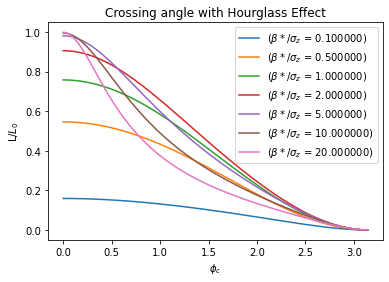

In [234]:
N = 100
Phi = np.linspace(0, np.pi, N + 1)
Luminosities = np.zeros(N + 1)
beta_star = np.array([.1, .5, 1, 2, 5, 10, 20])
for b_star in beta_star:
    for i, p in enumerate(Phi):
        Luminosities[i] = Luminosity_int(b_star, ex, 1, p)*np.cos(p/2)**2
    plt.plot(Phi, Luminosities, label = r"($\beta*/\sigma_z$ = %f)"%b_star)
plt.title(r"Crossing angle with Hourglass Effect")
plt.legend()
plt.ylabel(r"L/$L_0$")
plt.xlabel(r"$\phi_c$")
plt.show()